In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

In [2]:
data_url = 'https://data.open-power-system-data.org/time_series/2020-10-06/time_series_60min_singleindex.csv'
idata = 'time_series_60min_singleindex.csv'

In [3]:
df = pd.read_csv(idata)
df.head()

,utc_timestamp,cet_cest_timestamp,AT_load_actual_entsoe_transparency,AT_load_forecast_entsoe_transparency,AT_price_day_ahead,AT_solar_generation_actual,AT_wind_onshore_generation_actual,BE_load_actual_entsoe_transparency,BE_load_forecast_entsoe_transparency,BE_solar_generation_actual,...,SI_load_actual_entsoe_transparency,SI_load_forecast_entsoe_transparency,SI_solar_generation_actual,SI_wind_onshore_generation_actual,SK_load_actual_entsoe_transparency,SK_load_forecast_entsoe_transparency,SK_solar_generation_actual,SK_wind_onshore_generation_actual,UA_load_actual_entsoe_transparency,UA_load_forecast_entsoe_transparency
0,2014-12-31T23:00:00Z,2015-01-01T00:00:00+0100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2015-01-01T00:00:00Z,2015-01-01T01:00:00+0100,5946.0,6701.0,35.0,NaN,69.0,9484.0,9897.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2015-01-01T01:00:00Z,2015-01-01T02:00:00+0100,5726.0,6593.0,45.0,NaN,64.0,9152.0,9521.0,NaN,...,1045.47,816.0,NaN,1.17,2728.0,2860.0,3.8,NaN,NaN,NaN
3,2015-01-01T02:00:00Z,2015-01-01T03:00:00+0100,5347.0,6482.0,41.0,NaN,65.0,8799.0,9135.0,NaN,...,1004.79,805.0,NaN,1.04,2626.0,2810.0,3.8,NaN,NaN,NaN
4,2015-01-01T03:00:00Z,2015-01-01T04:00:00+0100,5249.0,6454.0,38.0,NaN,64.0,8567.0,8909.0,NaN,...,983.79,803.0,NaN,1.61,2618.0,2780.0,3.8,NaN,NaN,NaN


In [4]:
columns = [col for col in df.columns if col[:2] == 'AT']
columns

['AT_load_actual_entsoe_transparency',
 'AT_load_forecast_entsoe_transparency',
 'AT_price_day_ahead',
 'AT_solar_generation_actual',
 'AT_wind_onshore_generation_actual']

In [33]:
df_aut = df[['utc_timestamp',]+columns].copy() # 'cet_cest_timestamp'
df_aut.head()

,utc_timestamp,AT_load_actual_entsoe_transparency,AT_load_forecast_entsoe_transparency,AT_price_day_ahead,AT_solar_generation_actual,AT_wind_onshore_generation_actual
0,2014-12-31T23:00:00Z,NaN,NaN,NaN,NaN,NaN
1,2015-01-01T00:00:00Z,5946.0,6701.0,35.0,NaN,69.0
2,2015-01-01T01:00:00Z,5726.0,6593.0,45.0,NaN,64.0
3,2015-01-01T02:00:00Z,5347.0,6482.0,41.0,NaN,65.0
4,2015-01-01T03:00:00Z,5249.0,6454.0,38.0,NaN,64.0


In [34]:
df_aut.isna().sum()

utc_timestamp                               0
AT_load_actual_entsoe_transparency          1
AT_load_forecast_entsoe_transparency        1
AT_price_day_ahead                      17556
AT_solar_generation_actual                 62
AT_wind_onshore_generation_actual          49
dtype: int64

In [35]:
df_aut = df_aut.dropna(subset=['AT_price_day_ahead','AT_solar_generation_actual','AT_wind_onshore_generation_actual'],axis=0)
df_aut.head()


,utc_timestamp,AT_load_actual_entsoe_transparency,AT_load_forecast_entsoe_transparency,AT_price_day_ahead,AT_solar_generation_actual,AT_wind_onshore_generation_actual
8,2015-01-01T07:00:00Z,6343.0,7061.0,36.0,2.0,109.0
9,2015-01-01T08:00:00Z,6882.0,7233.0,41.0,10.0,146.0
10,2015-01-01T09:00:00Z,6963.0,7451.0,45.0,21.0,146.0
11,2015-01-01T10:00:00Z,7110.0,7547.0,50.0,32.0,158.0
12,2015-01-01T11:00:00Z,7136.0,7454.0,51.0,37.0,187.0


In [83]:
df_aut.describe()

,load_actual_entsoe_transparency,load_forecast_entsoe_transparency,price_day_ahead,solar_generation_actual,wind_onshore_generation_actual
count,32790.000000,32790.000000,32790.000000,32790.000000,32790.000000
mean,7073.752394,7134.777097,33.936414,126.315554,648.431504
std,1395.102322,1374.232456,14.955027,182.539373,602.921539
min,664.000000,3739.000000,-76.000000,0.000000,0.000000
25%,5953.000000,6030.000000,25.000000,0.000000,151.000000
50%,7043.000000,7129.000000,33.000000,16.000000,447.000000
75%,8092.000000,8099.750000,42.000000,214.000000,1010.000000
max,10788.000000,11608.000000,187.000000,911.000000,2662.000000


In [36]:
df_aut.shape

(32790, 6)

In [37]:
df_aut.isna().sum()

utc_timestamp                           0
AT_load_actual_entsoe_transparency      0
AT_load_forecast_entsoe_transparency    0
AT_price_day_ahead                      0
AT_solar_generation_actual              0
AT_wind_onshore_generation_actual       0
dtype: int64

In [38]:
# last row
df_aut.iloc[-1,:]

utc_timestamp                           2018-10-02T21:00:00Z
AT_load_actual_entsoe_transparency                    6393.0
AT_load_forecast_entsoe_transparency                  5986.0
AT_price_day_ahead                                      62.0
AT_solar_generation_actual                               0.0
AT_wind_onshore_generation_actual                     1095.0
Name: 32902, dtype: object

In [39]:
df_aut.columns = ['Date','load_actual_entsoe_transparency','load_forecast_entsoe_transparency',\
                  'price_day_ahead', 'solar_generation_actual', 'wind_onshore_generation_actual']

In [40]:
df_aut.dtypes

Date                                  object
load_actual_entsoe_transparency      float64
load_forecast_entsoe_transparency    float64
price_day_ahead                      float64
solar_generation_actual              float64
wind_onshore_generation_actual       float64
dtype: object

In [49]:
df_aut['Date'] = pd.to_datetime(df_aut['Date'])
df_aut.set_index('Date',inplace=True)

In [50]:
df_aut.dtypes

load_actual_entsoe_transparency      float64
load_forecast_entsoe_transparency    float64
price_day_ahead                      float64
solar_generation_actual              float64
wind_onshore_generation_actual       float64
dtype: object

In [51]:
df_aut.iloc[-6:,4:6]

,wind_onshore_generation_actual
Date,
2018-10-02 16:00:00+00:00,1001.0
2018-10-02 17:00:00+00:00,802.0
2018-10-02 18:00:00+00:00,615.0
2018-10-02 19:00:00+00:00,643.0
2018-10-02 20:00:00+00:00,884.0
2018-10-02 21:00:00+00:00,1095.0


In [59]:
df_aut.head()

,load_actual_entsoe_transparency,load_forecast_entsoe_transparency,price_day_ahead,solar_generation_actual,wind_onshore_generation_actual
Date,,,,,
2015-01-01 07:00:00+00:00,6343.0,7061.0,36.0,2.0,109.0
2015-01-01 08:00:00+00:00,6882.0,7233.0,41.0,10.0,146.0
2015-01-01 09:00:00+00:00,6963.0,7451.0,45.0,21.0,146.0
2015-01-01 10:00:00+00:00,7110.0,7547.0,50.0,32.0,158.0
2015-01-01 11:00:00+00:00,7136.0,7454.0,51.0,37.0,187.0


## find index with max value in each column

In [85]:
df_aut.index[2]

DatetimeIndex(['2015-01-01 07:00:00+00:00', '2015-01-01 08:00:00+00:00',
               '2015-01-01 09:00:00+00:00', '2015-01-01 10:00:00+00:00',
               '2015-01-01 11:00:00+00:00', '2015-01-01 12:00:00+00:00',
               '2015-01-01 13:00:00+00:00', '2015-01-01 14:00:00+00:00',
               '2015-01-01 15:00:00+00:00', '2015-01-01 16:00:00+00:00',
               ...
               '2018-10-02 12:00:00+00:00', '2018-10-02 13:00:00+00:00',
               '2018-10-02 14:00:00+00:00', '2018-10-02 15:00:00+00:00',
               '2018-10-02 16:00:00+00:00', '2018-10-02 17:00:00+00:00',
               '2018-10-02 18:00:00+00:00', '2018-10-02 19:00:00+00:00',
               '2018-10-02 20:00:00+00:00', '2018-10-02 21:00:00+00:00'],
              dtype='datetime64[ns, UTC]', name='Date', length=32790, freq=None)

In [62]:
df_aut.idxmax()

load_actual_entsoe_transparency     2018-02-27 09:00:00+00:00
load_forecast_entsoe_transparency   2017-01-27 09:00:00+00:00
price_day_ahead                     2018-10-01 17:00:00+00:00
solar_generation_actual             2018-08-12 11:00:00+00:00
wind_onshore_generation_actual      2017-10-27 20:00:00+00:00
dtype: datetime64[ns, UTC]

In [77]:
df_aut.loc[['2018-08-12 11:00:00+00:00','2017-10-27 20:00:00+00:00']]

,load_actual_entsoe_transparency,load_forecast_entsoe_transparency,price_day_ahead,solar_generation_actual,wind_onshore_generation_actual
Date,,,,,
2018-08-12 11:00:00+00:00,5654.0,5147.0,37.0,911.0,140.0
2017-10-27 20:00:00+00:00,6612.0,6796.0,33.0,0.0,2662.0


## Find all indices where column has specific value

In [75]:
vallist = df_aut.index[df_aut['solar_generation_actual'] == 37.0].tolist()
vallist[:5]

[Timestamp('2015-01-01 11:00:00+0000', tz='UTC'),
 Timestamp('2015-01-09 14:00:00+0000', tz='UTC'),
 Timestamp('2015-01-20 14:00:00+0000', tz='UTC'),
 Timestamp('2015-02-01 08:00:00+0000', tz='UTC'),
 Timestamp('2015-02-05 08:00:00+0000', tz='UTC')]

In [76]:
df_aut.loc[vallist]

,load_actual_entsoe_transparency,load_forecast_entsoe_transparency,price_day_ahead,solar_generation_actual,wind_onshore_generation_actual
Date,,,,,
2015-01-01 11:00:00+00:00,7136.0,7454.0,51.0,37.0,187.0
2015-01-09 14:00:00+00:00,6228.0,8078.0,21.0,37.0,1395.0
2015-01-20 14:00:00+00:00,8202.0,8522.0,50.0,37.0,302.0
2015-02-01 08:00:00+00:00,7342.0,7347.0,27.0,37.0,51.0
2015-02-05 08:00:00+00:00,8740.0,9137.0,63.0,37.0,231.0
2015-02-19 07:00:00+00:00,9035.0,9108.0,47.0,37.0,12.0
2015-04-20 17:00:00+00:00,7174.0,7402.0,39.0,37.0,1584.0
2015-04-30 17:00:00+00:00,7282.0,7285.0,41.0,37.0,826.0
2015-05-03 17:00:00+00:00,5828.0,5768.0,24.0,37.0,215.0


In [82]:
df_aut['price_day_ahead'].value_counts()

 32.0     1156
 31.0     1155
 29.0     1149
 30.0     1111
 34.0     1097
          ... 
 114.0       1
 133.0       1
 126.0       1
-46.0        1
 187.0       1
Name: price_day_ahead, Length: 181, dtype: int64

## Monthly data

In [60]:
# if Date is not index
df_aut_monthly = df_aut.reset_index().resample('M',on='Date').mean()
df_aut_monthly.head()

,load_actual_entsoe_transparency,load_forecast_entsoe_transparency,price_day_ahead,solar_generation_actual,wind_onshore_generation_actual
Date,,,,,
2015-01-31 00:00:00+00:00,6836.766328,7552.201742,29.339623,18.968070,756.403483
2015-02-28 00:00:00+00:00,7854.998512,7793.531250,38.855655,48.885417,684.354167
2015-03-31 00:00:00+00:00,7348.211876,7408.192982,31.080972,85.883941,705.128205
2015-04-30 00:00:00+00:00,6729.226389,6750.588889,30.437500,127.481944,735.625000
2015-05-31 00:00:00+00:00,5989.436828,6179.037634,25.188172,131.415323,549.778226


In [48]:
df_aut_monthly.index[2]

Timestamp('2015-03-31 00:00:00+0000', tz='UTC', freq='M')

In [17]:
df_aut_monthly.tail()

,load_actual_entsoe_transparency,load_forecast_entsoe_transparency,price_day_ahead,solar_generation_actual,wind_onshore_generation_actual
Date,,,,,
2018-06-30 00:00:00+00:00,6775.695833,6366.533333,42.650000,263.926389,708.476389
2018-07-31 00:00:00+00:00,6432.861559,6382.481183,49.208333,274.983871,562.103495
2018-08-31 00:00:00+00:00,6725.010753,6174.463710,56.649194,243.100806,455.594086
2018-09-30 00:00:00+00:00,6868.422222,6488.840278,55.487500,191.229167,561.058333
2018-10-31 00:00:00+00:00,7634.260870,7052.913043,61.130435,153.913043,984.260870


In [18]:
df_aut_monthly = df_aut_monthly.loc['2015-01-01':]

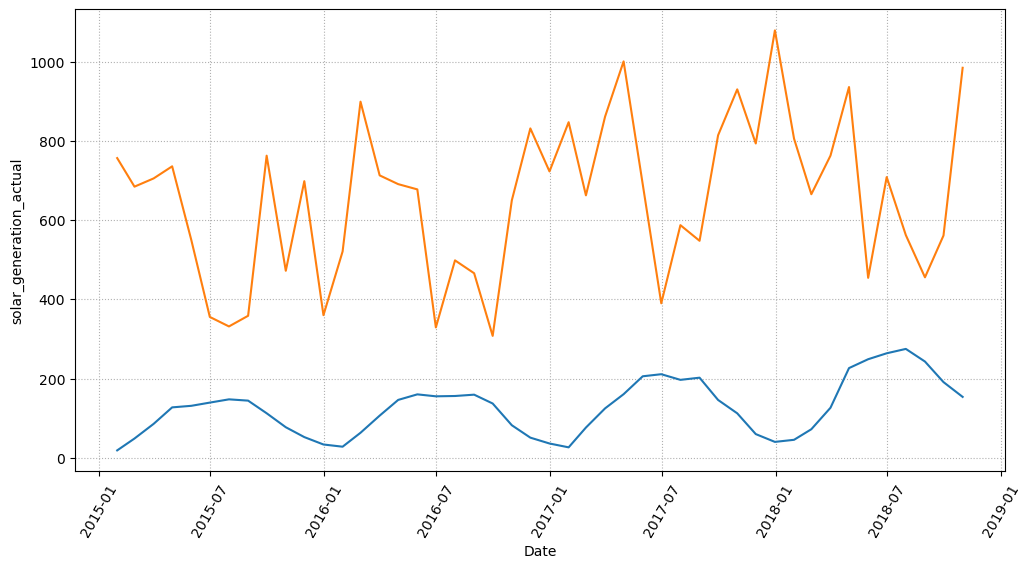

In [36]:
plt.figure(figsize=(12,6))
sns.lineplot(x='Date', y='solar_generation_actual', data=df_aut_monthly)
sns.lineplot(x='Date', y='wind_onshore_generation_actual', data=df_aut_monthly)
plt.grid(ls=':')
plt.xticks(rotation=60)
plt.show()

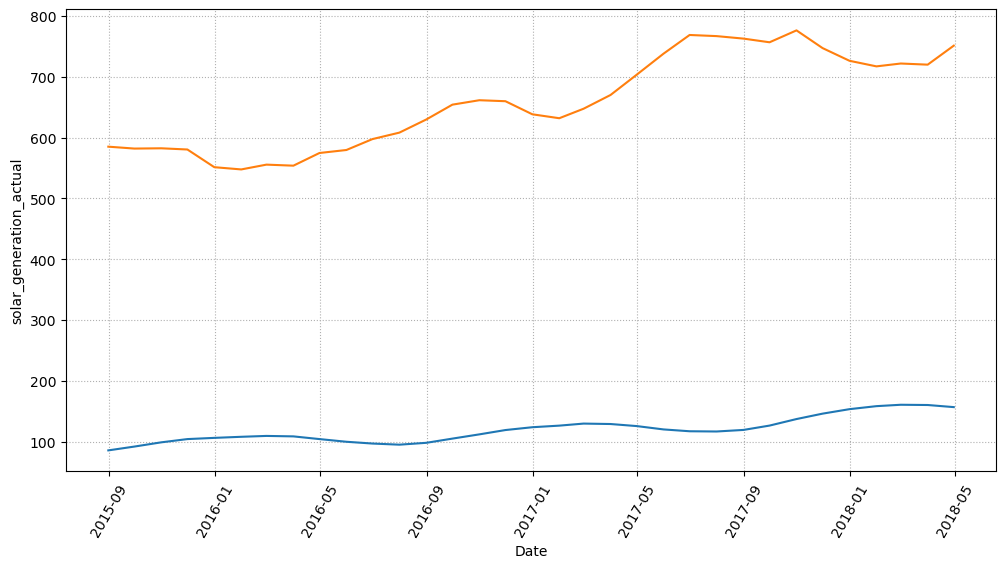

In [37]:
df_ma = df_aut_monthly.rolling(window=14, center=True).mean()

plt.figure(figsize=(12,6))
sns.lineplot(x='Date', y='solar_generation_actual', data=df_ma)
sns.lineplot(x='Date', y='wind_onshore_generation_actual', data=df_ma)
plt.grid(ls=':')
plt.xticks(rotation=60)
plt.show()

<Figure size 1200x600 with 0 Axes>

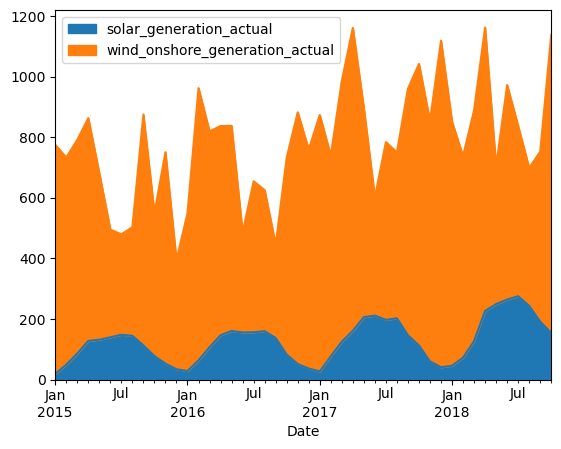

In [38]:
plt.figure(figsize=(12,6))
df_aut_monthly[['solar_generation_actual','wind_onshore_generation_actual']].plot.area()
plt.show()

<Figure size 1200x600 with 0 Axes>

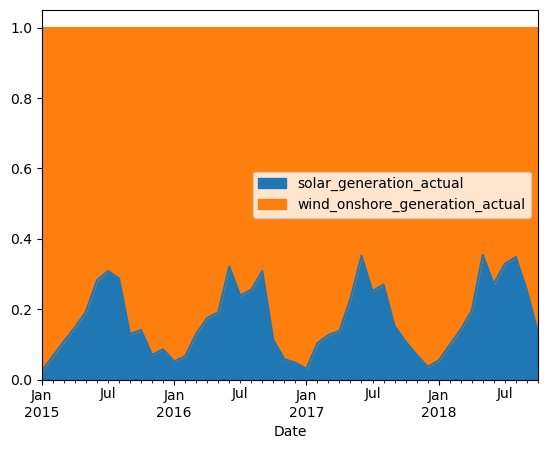

In [39]:
df_pc =  df_aut_monthly.iloc[:,3:5].div(df_aut_monthly.iloc[:,3:5].sum(axis=1),axis=0)

plt.figure(figsize=(12,6))
df_pc.plot.area()
plt.show()

## Seasonality

In [91]:
df_season_mean = df_aut_monthly.groupby(df_aut_monthly.index.month).mean()
df_season_mean

,load_actual_entsoe_transparency,load_forecast_entsoe_transparency,price_day_ahead,solar_generation_actual,wind_onshore_generation_actual,month
Date,,,,,,
1,7829.269875,8034.307492,35.030134,29.879450,732.394554,1.0
2,8038.271718,8041.872729,35.493175,65.309165,727.692221,2.0
3,7597.317457,7697.268933,30.877723,110.996592,760.394585,3.0
4,6801.255208,6852.640278,29.104861,165.277431,840.611806,4.0
5,6388.433343,6441.651181,28.142481,186.654875,592.940286,5.0
6,6595.460061,6547.766319,32.599155,192.496240,445.820064,6.0
7,6490.606183,6579.458669,36.306452,193.956989,494.839718,7.0
8,6437.292003,6365.256048,36.551075,187.372648,456.934476,8.0
9,6711.082292,6784.362153,38.136806,146.820486,611.328819,9.0


In [87]:
df_aut_monthly['month'] = df_aut_monthly.index.month

In [88]:
df_aut_monthly.head()

,load_actual_entsoe_transparency,load_forecast_entsoe_transparency,price_day_ahead,solar_generation_actual,wind_onshore_generation_actual,month
Date,,,,,,
2015-01-31 00:00:00+00:00,6836.766328,7552.201742,29.339623,18.968070,756.403483,1
2015-02-28 00:00:00+00:00,7854.998512,7793.531250,38.855655,48.885417,684.354167,2
2015-03-31 00:00:00+00:00,7348.211876,7408.192982,31.080972,85.883941,705.128205,3
2015-04-30 00:00:00+00:00,6729.226389,6750.588889,30.437500,127.481944,735.625000,4
2015-05-31 00:00:00+00:00,5989.436828,6179.037634,25.188172,131.415323,549.778226,5


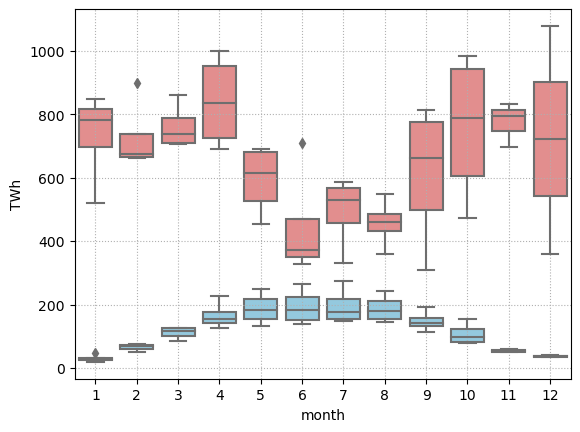

In [89]:
sns.boxplot(x='month',y='solar_generation_actual',data=df_aut_monthly, color='skyblue')
sns.boxplot(x='month',y='wind_onshore_generation_actual',data=df_aut_monthly,color='lightcoral')
plt.grid(ls=':')
plt.ylabel('TWh')
plt.show()

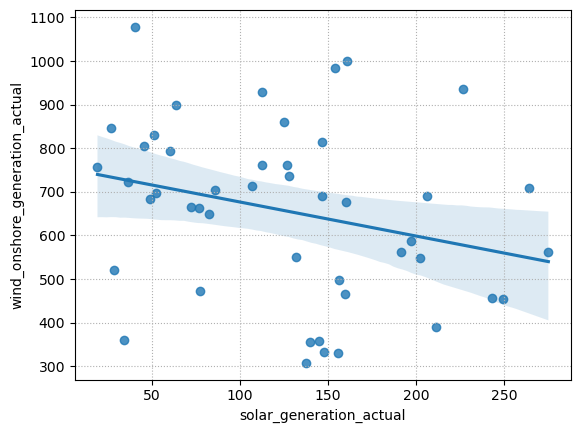

In [44]:
sns.regplot(x='solar_generation_actual', y='wind_onshore_generation_actual', data=df_aut_monthly)
plt.grid(ls=':')

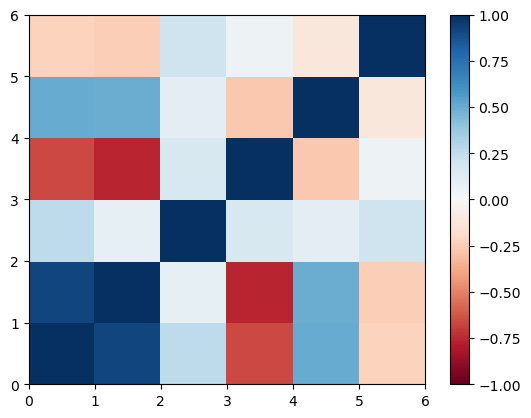

In [45]:
#plt.pcolor(df_aut_monthly.iloc[:,[0,1,3]].corr(), cmap='RdBu')
plt.pcolor(df_aut_monthly.corr(), cmap='RdBu', vmin=-1.0, vmax=1.0)
plt.colorbar()
plt.show()

<AxesSubplot:xlabel='Date'>

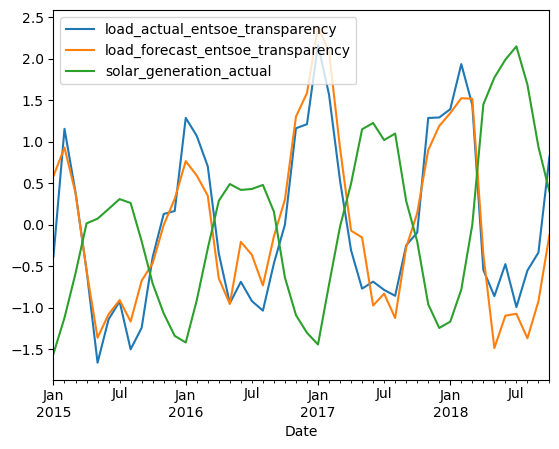

In [46]:
df_norm =( df_aut_monthly.iloc[:,[0,1,3]] - df_aut_monthly.iloc[:,[0,1,3]].mean())/df_aut_monthly.iloc[:,[0,1,3]].std()
df_norm.plot(kind='line')

## Trend

In [47]:
from sklearn.linear_model import LinearRegression

In [48]:
x_data = df_aut_monthly.index
y_data = df_aut_monthly['solar_generation_actual'].to_numpy()

In [49]:
LR = LinearRegression()

In [50]:
x_data_lr = np.arange(len(x_data))

In [51]:
LR.fit(x_data_lr.reshape(-1,1),y_data)

LinearRegression()

In [52]:
fit = LR.intercept_ + LR.coef_*x_data_lr

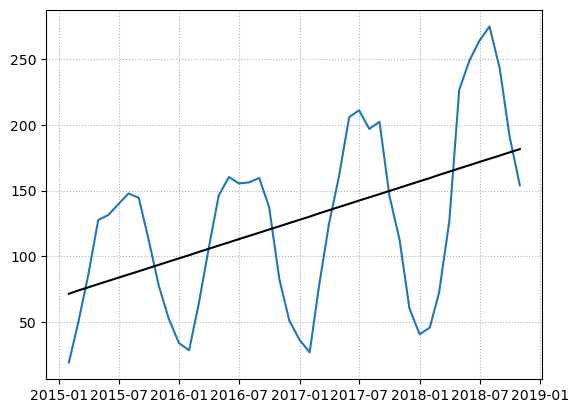

In [53]:
plt.plot(x_data,y_data)
plt.plot(x_data,fit,'k-')
plt.grid(ls=':')
plt.show()

## Detrenden

In [54]:
from scipy import signal

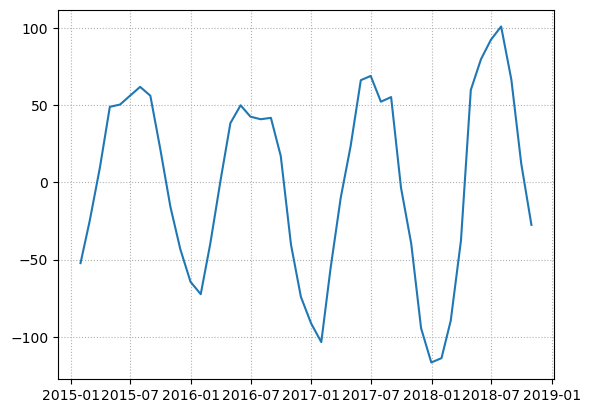

In [55]:
plt.plot(x_data,signal.detrend(y_data))
plt.grid(ls=':')
plt.show()

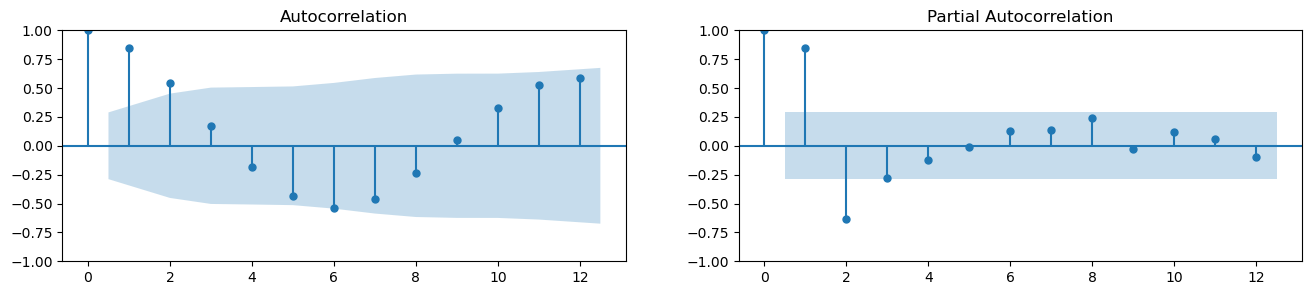

In [57]:
# ACF -> check frequency of seasonality
# PACF -> similar to ACF but no correlation contributions from intermediate lags

#from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

fig, axes = plt.subplots(1,2,figsize=(16,3), dpi= 100)
plot_acf(y_data, lags=12, ax=axes[0])
plot_pacf(y_data, lags=12, ax=axes[1],method='ywm')
plt.show()

## poly fit

In [74]:
x_data_lr = np.arange(len(x_data))

f = np.polyfit(x_data_lr,y_data,12)
p = np.poly1d(f)
print(p)

            12             11             10             9
-3.148e-12 x  + 8.829e-10 x  - 1.079e-07 x  + 7.527e-06 x
              8            7          6       5         4         3
 - 0.0003307 x + 0.009503 x - 0.1798 x + 2.2 x - 16.64 x + 72.04 x
          2
 - 158.9 x + 165.9 x + 10.65


[]

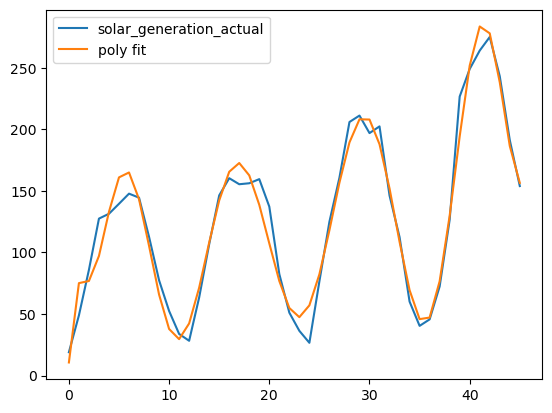

In [75]:
plt.plot(x_data_lr,y_data, label='solar_generation_actual')
plt.plot(x_data_lr,p(x_data_lr),label='poly fit')
plt.legend()
plt.plot()

In [76]:
## für mehr als 1 dimension:
#from sklearn.preprocessing import PolynomialFeatures, StandardScaler
#pr = PolynomialFeatures(degree=2)#,include_bias=False)
# Z = df[['1','2','3']]
#Z_pr = pr.fit_transform(Z)
#SCALE = StandardScaler()
#SCALE.fit(df[['1','2']])
#x_scale=SCALE.transform(df[['1','2']])

## Pipeline

In [194]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures, StandardScaler

In [213]:
score_arr = []
orders = np.arange(2,14)

for i in orders:
    Input = [('scale', StandardScaler()),('polynomial',PolynomialFeatures(degree=i)),('model',LinearRegression())] 
    pipe = Pipeline(Input)
    pipe.fit(x_data_lr.reshape(-1, 1),y_data)
    
    score_arr += [pipe.score(x_data_pred.reshape(-1, 1),y_data)]


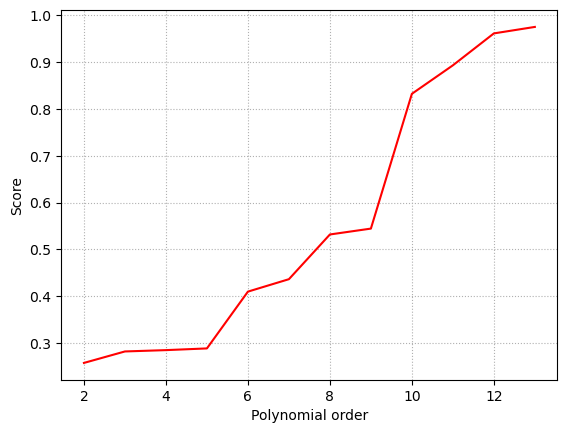

In [222]:
plt.figure()
plt.plot(orders,score_arr,'r-')
plt.grid(ls=':')
plt.xlabel('Polynomial order')
plt.ylabel('Score')
plt.show()

### Prediction

In [218]:
x_data_pred = np.arange(50)
y_data_pred = pipe.predict(x_data_pred.reshape(-1, 1))

[]

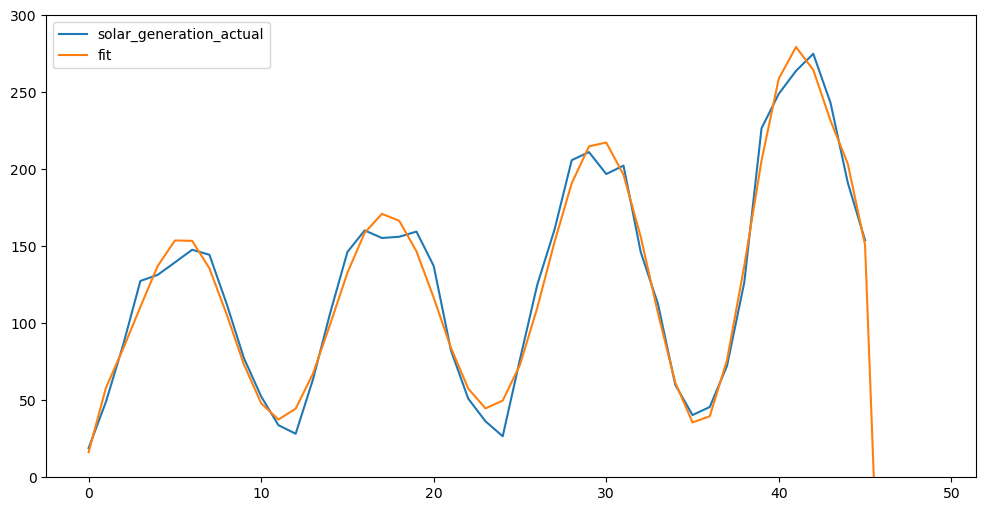

In [223]:
plt.figure(figsize=(12,6))
plt.plot(x_data_lr,y_data, label='solar_generation_actual')
#plt.plot(x_data_lr,p(x_data_lr),label='poly fit')
plt.plot(x_data_pred,y_data_pred,label='fit')
plt.legend()
plt.ylim(0,300)
plt.plot()

# Forecast model

In [11]:
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense

2024-02-06 23:14:31.067358: I tensorflow/core/util/port.cc:111] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-02-06 23:14:31.082649: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-06 23:14:31.082664: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-06 23:14:31.082677: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-02-06 23:14:31.085928: I tensorflow/core/platform/cpu_feature_g

In [409]:
import keras

In [12]:
import tensorflow as tf
from tensorflow.keras import layers, models, callbacks, losses

In [98]:
df_aut.describe()

,AT_load_actual_entsoe_transparency,AT_load_forecast_entsoe_transparency,AT_price_day_ahead,AT_solar_generation_actual,AT_wind_onshore_generation_actual
count,50400.000000,50400.000000,32845.000000,50339.000000,50352.000000
mean,7070.148631,7039.848552,33.934663,135.280121,729.653261
std,1400.263167,1355.382837,14.944863,198.955378,692.002497
min,664.000000,3739.000000,-76.000000,0.000000,0.000000
25%,5941.000000,5941.000000,25.000000,0.000000,162.000000
50%,7032.000000,7018.000000,33.000000,18.000000,493.000000
75%,8079.000000,7986.000000,42.000000,224.000000,1141.000000
max,10803.000000,11608.000000,187.000000,1166.000000,2969.000000


# Daily data

In [418]:
df_aut_daily = df_aut.resample('D',on='utc_timestamp').mean().loc['2015-01-01':'2019-12-29']
df_aut_daily.tail()

,AT_load_actual_entsoe_transparency,AT_load_forecast_entsoe_transparency,AT_price_day_ahead,AT_solar_generation_actual,AT_wind_onshore_generation_actual
utc_timestamp,,,,,
2019-12-25 00:00:00+00:00,6095.250000,6602.125000,NaN,37.875000,1758.375000
2019-12-26 00:00:00+00:00,6324.583333,6569.083333,NaN,38.333333,1278.000000
2019-12-27 00:00:00+00:00,7017.750000,6384.250000,NaN,32.666667,1199.166667
2019-12-28 00:00:00+00:00,7045.583333,7081.250000,NaN,24.333333,2616.958333
2019-12-29 00:00:00+00:00,6921.583333,6497.083333,NaN,37.208333,1748.500000


In [419]:
df_aut_daily.isna().sum()

AT_load_actual_entsoe_transparency        0
AT_load_forecast_entsoe_transparency      0
AT_price_day_ahead                      453
AT_solar_generation_actual                0
AT_wind_onshore_generation_actual         0
dtype: int64

In [420]:
df_aut_daily.shape

(1824, 5)

## Training data

In [509]:
training_data = df_aut_daily['AT_load_forecast_entsoe_transparency'].to_numpy()

In [510]:
#training_data = (training_data - training_data.mean())/training_data.std()

In [511]:
x_data = training_data.reshape(-1,32)[...,np.newaxis]

In [512]:
x_data.shape

(57, 32, 1)

In [513]:
y_data = x_data[1:,0,0]

In [514]:
y_data.shape

(56,)

In [515]:
x_data = x_data[:-1,:,:]

In [516]:
x_data.shape

(56, 32, 1)

In [517]:
model = Sequential()
model.add(LSTM(32, activation='relu', return_sequences=True, input_shape=(32, 1)))
model.add(LSTM(64, activation='relu', return_sequences=True))
model.add(LSTM(128, activation='relu', return_sequences=True))
#model.add(LSTM(256, activation='relu', return_sequences=True))
#model.add(LSTM(128, activation='relu', return_sequences=True))
#model.add(LSTM(64, activation='relu', return_sequences=True))
model.add(LSTM(32, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')


In [518]:
callback = keras.callbacks.EarlyStopping(monitor='loss', start_from_epoch=100, patience=3)

# fit model
model.fit(x_data, y_data, epochs=500 ,batch_size=4, callbacks=[callback])#, verbose=0)

Epoch 1/500
14/14 [==============================] - 2s 20ms/step - loss: 59448116.0000
Epoch 2/500
14/14 [==============================] - 0s 23ms/step - loss: 47794504.0000
Epoch 3/500
14/14 [==============================] - 0s 19ms/step - loss: 75327696.0000
Epoch 4/500
14/14 [==============================] - 0s 20ms/step - loss: 47364004.0000
Epoch 5/500
14/14 [==============================] - 0s 19ms/step - loss: 47815124.0000
Epoch 6/500
14/14 [==============================] - 0s 19ms/step - loss: 55622596.0000
Epoch 7/500
14/14 [==============================] - 0s 20ms/step - loss: 49986116.0000
Epoch 8/500
14/14 [==============================] - 0s 19ms/step - loss: 50766344.0000
Epoch 9/500
14/14 [==============================] - 0s 20ms/step - loss: 35633032.0000
Epoch 10/500
14/14 [==============================] - 0s 21ms/step - loss: 22392314.0000
Epoch 11/500
14/14 [==============================] - 0s 19ms/step - loss: 39450452.0000
Epoch 12/500
14/14 [==========

## Predict

In [520]:
callback.best_epoch

101

In [521]:
df_aut_daily_test = df_aut.resample('D',on='utc_timestamp').mean().loc['2020-01-01':'2020-02-01']
df_aut_daily_test.tail()

,AT_load_actual_entsoe_transparency,AT_load_forecast_entsoe_transparency,AT_price_day_ahead,AT_solar_generation_actual,AT_wind_onshore_generation_actual
utc_timestamp,,,,,
2020-01-28 00:00:00+00:00,8656.500000,8405.708333,NaN,50.250000,503.708333
2020-01-29 00:00:00+00:00,8693.250000,8413.583333,NaN,65.416667,1459.166667
2020-01-30 00:00:00+00:00,8484.708333,8365.583333,NaN,74.333333,952.125000
2020-01-31 00:00:00+00:00,8112.416667,8315.291667,NaN,62.375000,1619.250000
2020-02-01 00:00:00+00:00,6815.458333,7262.291667,NaN,110.708333,840.625000


In [522]:
test_data = df_aut_daily_test['AT_load_forecast_entsoe_transparency'].to_numpy()
#test_data = (test_data - test_data.mean())/test_data.std()
test_data = test_data.reshape(1,-1,1)
test_data.shape

(1, 32, 1)

In [523]:
#x_input = array([70, 80, 90])
#x_input = x_input.reshape((1, n_steps, n_features))

for i in range(14):
    forecast = model.predict(test_data[:,i:i+33,:], verbose=0)
    test_data = np.append(test_data,forecast.reshape([1,1,1]),axis=1)
    

In [524]:
test_data.shape

(1, 46, 1)

In [525]:
type(test_data)

numpy.ndarray

In [526]:
df_aut_daily_validation = df_aut.resample('D',on='utc_timestamp').mean().loc['2020-01-01':'2020-02-15']

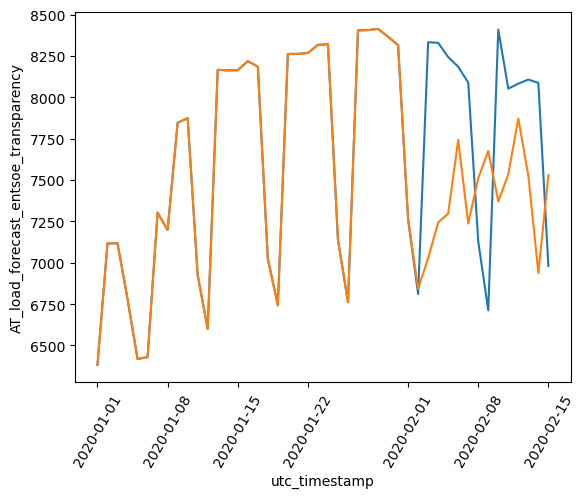

In [527]:
sns.lineplot(x='utc_timestamp',y='AT_load_forecast_entsoe_transparency',data=df_aut_daily_validation)
plt.plot(df_aut_daily_validation.index,np.squeeze(test_data))
plt.xticks(rotation=60)
plt.show()

In [582]:
import process as ps

ModuleNotFoundError: No module named 'process'